# <center> Password strength prediction </center>

We have a data set which contains 669640 possible words for password and their corresponding strength. Based on NLP techniques such as TFiDF model, we extract the features to perform ML algorithems to create a model.
We use ML Regression algorithms such as:

* Logistical Regression ( OVR , Multinomial )
* 

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('data.csv',',',error_bad_lines=False)
df.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
df.shape

(669640, 2)

> Here we have a large dataset of 669640 rows

In [63]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [5]:
df[df['password'].isnull()]

,password,strength
367579,NaN,0


> We have one NULL value for the password column, which could be dropped

In [6]:
df.dropna(inplace=True)  

In [7]:
df.isnull().sum()

password    0
strength    0
dtype: int64

In [8]:
password_tuple = np.array(df)

In [9]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

> As the dataset is sorted in order of strength, we can shuffle the datasets randomly

In [10]:
import random
random.shuffle(password_tuple)

In [11]:
x = [label[0] for label in password_tuple]
y = [label[1] for label in password_tuple]

### CountPlot of the datasets based on Strength

<AxesSubplot:xlabel='strength', ylabel='count'>

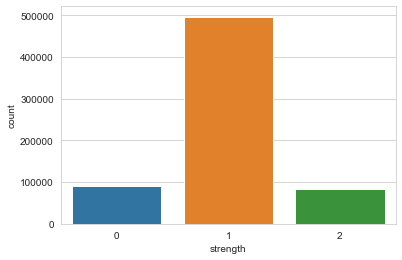

In [64]:
sns.set_style('whitegrid')
sns.countplot(x='strength', data=df)

> seems like and imbalance dataset. 
The data for strength 1 is very high when compared. The model might is a biased toward strength one.

In [15]:
def word_div_char(word):
  chars =[]
  for char in word:
    chars.append(char)
  return chars

###  Feature Extraction using NLP technique Tfidf Vectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=word_div_char)

In [20]:
X = vectorizer.fit_transform(x)

In [21]:
X.shape

(669639, 130)

> Tfidf converted the whole dataset in to vectors of 130 dimensions

In [22]:
vectorizer.vocabulary_

{'k': 58,
 'z': 73,
 'd': 51,
 'e': 52,
 '5': 31,
 '7': 33,
 'v': 69,
 'i': 56,
 's': 66,
 '1': 27,
 'y': 72,
 'r': 65,
 'n': 61,
 'o': 62,
 '3': 29,
 '4': 30,
 'a': 48,
 'q': 64,
 'l': 59,
 'm': 60,
 'g': 54,
 'f': 53,
 't': 67,
 'b': 49,
 'h': 55,
 '6': 32,
 '2': 28,
 '0': 26,
 '8': 34,
 'j': 57,
 '9': 35,
 'p': 63,
 'u': 68,
 'c': 50,
 '-': 23,
 '.': 24,
 'w': 70,
 '>': 39,
 'x': 71,
 '!': 13,
 '&': 18,
 '?': 40,
 '<': 37,
 '@': 41,
 ';': 36,
 '_': 46,
 '%': 17,
 '#': 15,
 '$': 16,
 '±': 85,
 ' ': 12,
 '"': 14,
 '~': 77,
 '+': 22,
 '^': 45,
 '/': 25,
 ')': 20,
 '`': 47,
 '(': 19,
 '*': 21,
 '{': 74,
 '}': 76,
 'þ': 121,
 'ó': 111,
 '[': 42,
 ']': 44,
 '=': 38,
 'ô': 112,
 '\x1c': 10,
 '¿': 93,
 '\x19': 8,
 '\\': 43,
 'å': 100,
 '‚': 126,
 'ä': 99,
 'ú': 117,
 '°': 84,
 '´': 88,
 '³': 87,
 'à': 96,
 'ð': 108,
 'â': 98,
 '²': 86,
 '\x16': 6,
 'ò': 110,
 '·': 90,
 '\x1e': 11,
 '\x05': 0,
 '\x1b': 9,
 '\x7f': 78,
 '«': 83,
 'ÿ': 122,
 '|': 75,
 '\x10': 3,
 '\x17': 7,
 'ß': 95,
 'ý': 120

### Visualising the TFidf vector for the first data

In [23]:
df.iloc[0,0]

'kzde5577'

In [24]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X[0]
 
#print the scores
score = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
score.sort_values(by=["tfidf"],ascending=False).head(10)

,tfidf
7,0.590949
5,0.567337
z,0.336063
k,0.292419
d,0.285397
e,0.221380
ß,0.000000
à,0.000000
×,0.000000
¿,0.000000


### Train - Test - Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

> Logistic Reg is mainly used of binary classfication, with few hyperparameter tuning we could make it work for multi class classfier


parameter multi_class is tuned for both OVR and Multinomial separatly to understand the performance

In [65]:
# OVR tunned 

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty = 'l2', multi_class='ovr', max_iter=1000)

In [66]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [69]:
print(f'The R2 Score >> {np.round(log_reg.score(X_test,y_test), 2)}%')

The R2 Score >> 0.81%


With OVR tunned LogisticalRegression Model is able is give <b> 81% </b> Accuracy

In [70]:
# Multinomial Tuned
logm_reg = LogisticRegression(penalty = 'l2', multi_class='multinomial',solver='newton-cg', max_iter=1000)
logm_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

In [72]:
print(f'The R2 Score >> {np.round(logm_reg.score(X_test,y_test), 2)}%')

The R2 Score >> 0.82%


With OVR tunned LogisticalRegression Model is able is give <b> 82% </b> Accuracy

In [80]:
#np.array does not take an iterator, you need convert to list first,

parray = np.array(['@34abc'])
x_pred = vectorizer.transform(parray)
y_pred = logm_reg.predict(X_predict)
print(f'The predicted value is >> {y_pred[0]}')

The predicted value is >> 2


In [95]:
from sklearn.metrics import confusion_matrix
y_pred = logm_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

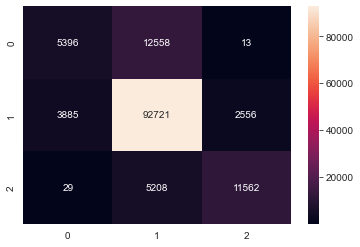

In [98]:
sns.heatmap(cm, annot=True, fmt="d")

* The problems of imbalance dataset is clearly shown in the confusion metrics. The Strength 1 is more prominent that others

>The combination of words play an import role in predicting the score

## Multinominal Navie Bayes Algorithm

In [87]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

In [88]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [90]:
print(f'The R2 Score >> {np.round(nb_classifier.score(X_test,y_test), 2)}%')

The R2 Score >> 0.74%


With Multinominal Naive bayed Model, we are able to get <b> 74 % </b> Accuracy, which is the lowest

In [99]:
parray = np.array(['@34$abc'])
x_pred = vectorizer.transform(parray)
y_pred = nb_classifier.predict(X_predict)
print(f'The predicted value is >> {y_pred[0]}')

The predicted value is >> 2


<AxesSubplot:>

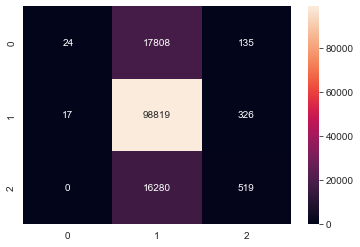

In [100]:
y_pred = nb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

* we can clearly understand why and how the accuray has reduced

## XGboost Algorithm

In [81]:
import xgboost as xgb

In [83]:
xgb_classifer = xgb.XGBClassifier()

In [84]:
xgb_classifer.fit(X_train, y_train)

[15:41:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [104]:
print(f'The R2 Score >> {np.round(xgb_classifer.score(X_test,y_test), 3)}%')

The R2 Score >> 0.986%


Its very surprising to get an accuracy of <b> 98% </b> using XGboost.

<AxesSubplot:>

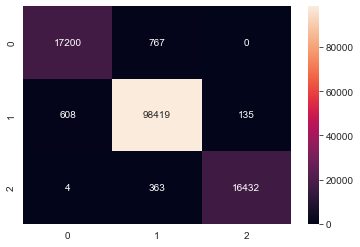

In [103]:
y_pred = xgb_classifer.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

* Most of the data was succesfully classified correctly. Lets try it with Randomforest Classifer before confirming the model for deployment

## Random Forest Classifer

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf_classifer = RandomForestClassifier()

In [109]:
rf_classifer.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
print(f'The R2 Score >> {np.round(rf_classifer.score(X_test,y_test), 3)}%')

In [ ]:
y_pred = rf_classifer.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

### Exporting ML model for deployment

In [110]:
import pickle
file_name = 'xgb_classifer.pkl'
pickle.dump(xgb_classifer, open(file_name, 'wb'))

### Exporting theTFidf Vectorizer

In [111]:
import pickle
file_name = 'vectorizer.pkl'
pickle.dump(vectorizer, open(file_name, 'wb'))